In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

# 1) Explore Data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/GradAdmissions.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1


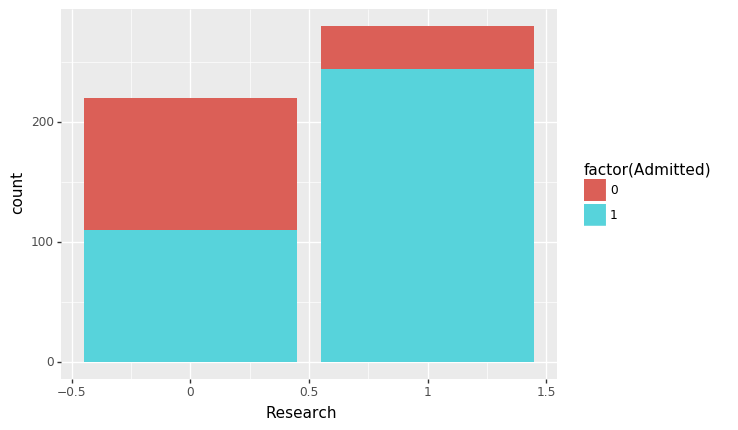

<ggplot: (304319461)>

In [24]:
(ggplot(data, aes("Research")) +
    geom_bar(aes(fill = "factor(Admitted)")))

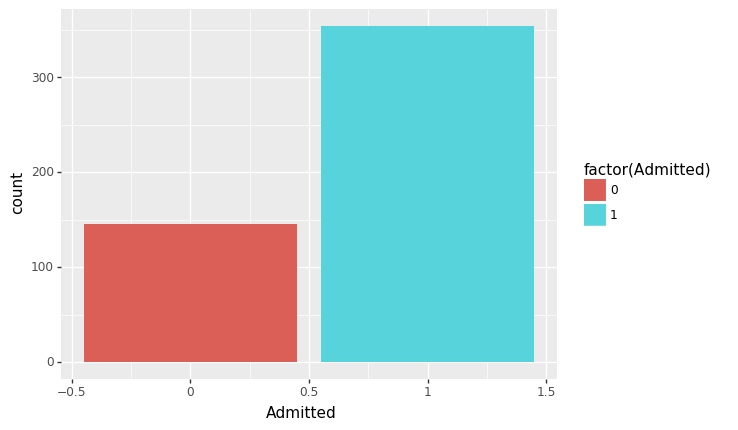

<ggplot: (304315257)>

In [23]:
(ggplot(data, aes("Admitted")) +
    geom_bar(aes(fill = "factor(Admitted)")))

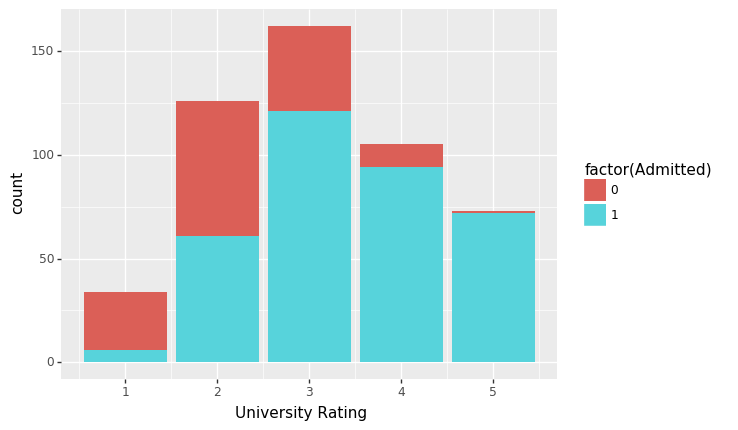

<ggplot: (304176441)>

In [11]:
(ggplot(data, aes("University Rating", fill = "factor(Admitted)")) +
    geom_bar())

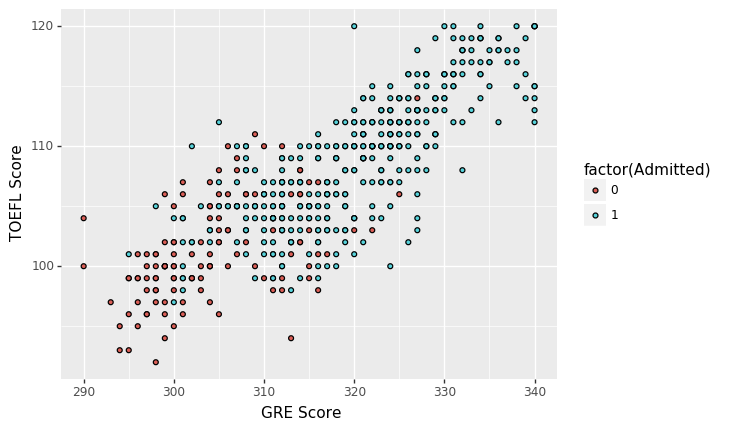

<ggplot: (304095845)>

In [10]:
(ggplot(data, aes("GRE Score", "TOEFL Score", fill = "factor(Admitted)")) +
    geom_point())

# with a high TOEFL Score and a high GRE Score, a student is almost guarenteed admission

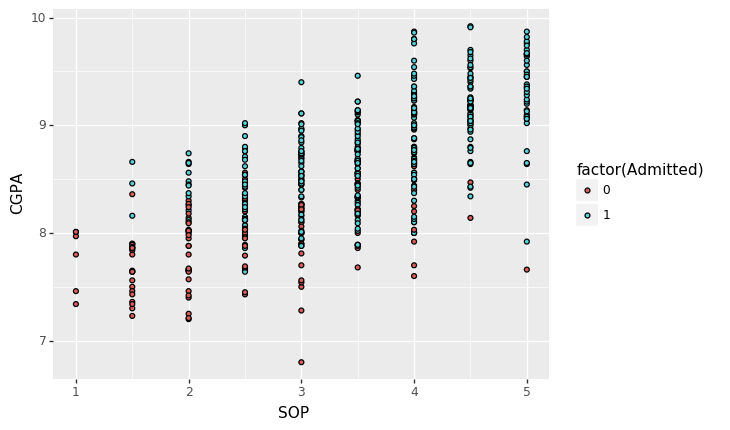

<ggplot: (274256861)>

In [9]:
(ggplot(data, aes("SOP", "CGPA", fill = "factor(Admitted)")) +
    geom_point())

# with a high CGPA and a high SOP, a student is almost guarenteed admission

# 2) Cross-validation and Standardization

In [18]:

X = data[["GRE Score","TOEFL Score","LOR ","SOP", "CGPA"]] # predictors
y = data["Admitted"] # outcome

# cross validation: creating test and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #data 
X_train.head()

#standardization
zscore = StandardScaler() 
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

# my created model 
My_model = LogisticRegression() #create model
My_model.fit(Xz_train,y_train) #fit
predictedVals = My_model.predict(Xz_test) #predict

# prints accuracy of my model
accuracy_score(y_test,predictedVals)

0.82

In [19]:
# prints off confusion matrix
confusion_matrix(y_test,predictedVals)

array([[15,  5],
       [13, 67]])

In [ ]:
# my model was pretty accurate with an 0.82 accuracy score. 
# it accurately predicted 82 (15+67) observations and inaccurately predicted 18 (5+13) observations. 

In [20]:
# create k-fold object
kf = KFold(n_splits = 5)
kf.split(X)

acc = [] 
lr = LogisticRegression() 

for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    acc.append(accuracy_score(y_test, model.predict(X_test)))
    
#print overall acc
print(acc)
np.mean(acc)

[0.67, 0.84, 0.89, 0.84, 0.78]


0.8039999999999999

In [ ]:
# this shows the accuracy of five different instances of the model, 0.67 being the worst and 0.89 being the best. 
# Moving forward I would use this model beacause it averages about a 0.80 accuracy score. 
# "GRE Score","TOEFL Score","LOR ","SOP", and "CGPA" are then great variables for predicting whether a student will be admitted.